In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CAR_DETAILS.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


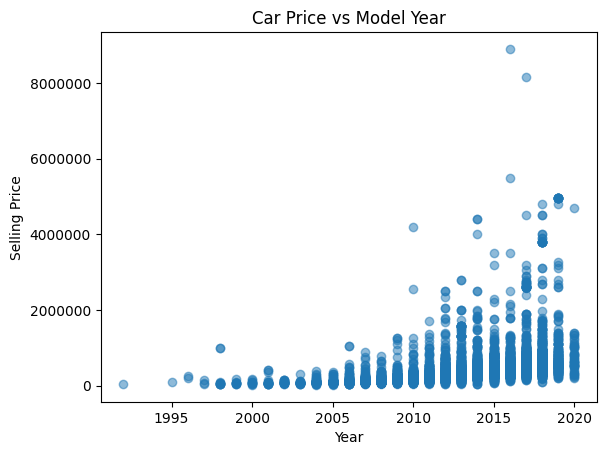

In [7]:
plt.scatter(df['year'],df['selling_price'],alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Car Price vs Model Year')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Older models are cheaper as more depreciation has occured
Some outliers show rare or luxury older models
major chunk of cars is priced under 20 lacs
models range from 1992 to 2020

In [8]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

Text(0, 0.5, 'Selling Price')

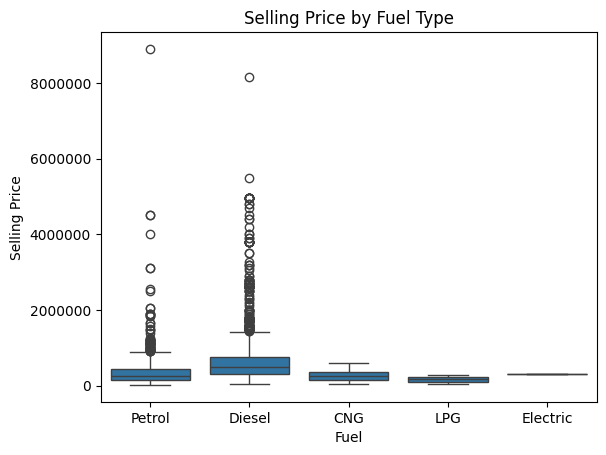

In [9]:
sns.boxplot(x='fuel',y='selling_price',data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Selling Price')

Petrol and diesl cars spread over wide spectrum
rest of the fuels remain towards lower pricing due to may be lower resale value
Diesel cars have higher median prices

In [10]:
df.groupby('fuel').size()

fuel
CNG           40
Diesel      2153
Electric       1
LPG           23
Petrol      2123
dtype: int64

In [11]:
order=df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False).index

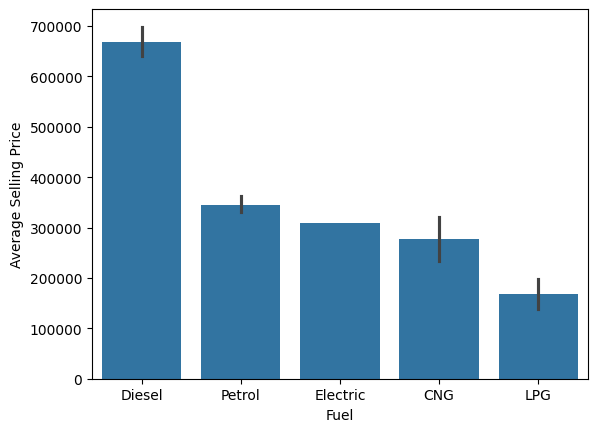

In [12]:

sns.barplot(x='fuel',y='selling_price',data=df,estimator="mean",order=order)
plt.xlabel('Fuel')
plt.ylabel('Average Selling Price')
plt.show()

Average selling price of diesel cars is highest above 600000 and LPG lowest under 200000


In [13]:
order=df.groupby('transmission')['selling_price'].mean().sort_values(ascending=False).index

Text(0, 0.5, 'Selling Price')

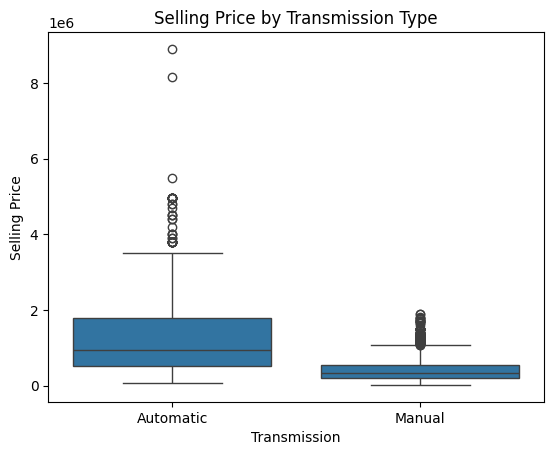

In [14]:
sns.boxplot(x='transmission', y='selling_price', data=df, order=order)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')

Automatic transmission sells for higher price on average
Manual transmission sells for lower prices on average
Outliers show expensive manual cars

In [15]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [16]:
order=df.groupby('owner')['selling_price'].mean().sort_values(ascending=False).index

Text(0, 0.5, 'Average Selling Price')

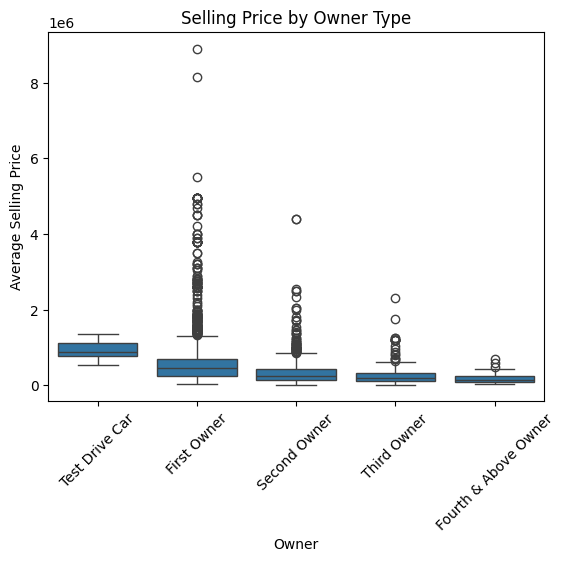

In [17]:
sns.boxplot(x='owner', y='selling_price', data=df, order=order)
plt.title('Selling Price by Owner Type')
plt.xlabel('Owner')
plt.xticks(rotation=45)
plt.ylabel('Average Selling Price')

Test drive cars had highest average selling price
while oldest fourth or above owners prices were the lowest on average

<Axes: title={'center': 'Selling Price vs KMs Driven'}, xlabel='km_driven', ylabel='selling_price'>

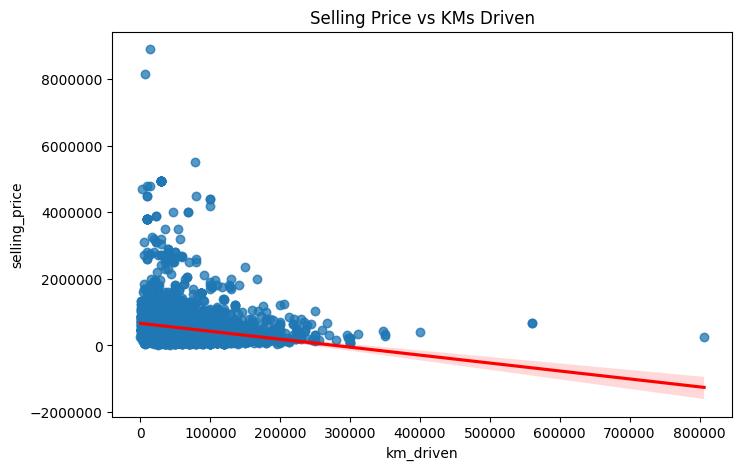

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['km_driven'],df['selling_price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Selling Price vs KMs Driven')
plt.xlabel('KMs Driven')
plt.ylabel('Selling Price')
sns.regplot(x='km_driven', y='selling_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

This chart simply tells us lower the running higher the selling price is.

Text(0, 0.5, 'Selling Price')

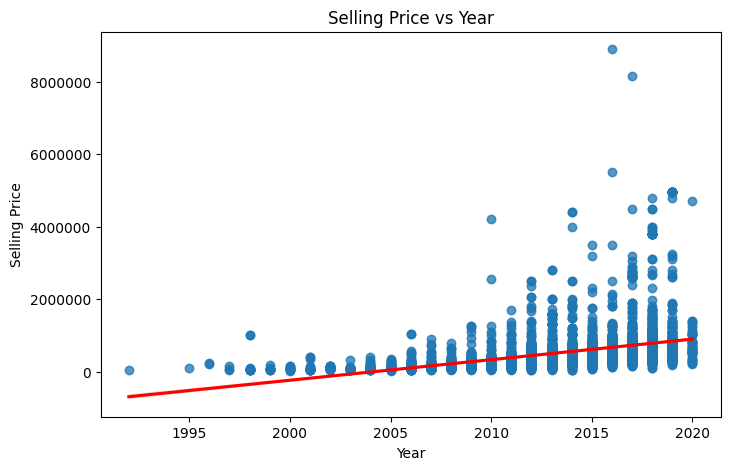

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'],df['selling_price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
ax=sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax.set_title('Selling Price vs Year')
ax.set_xlabel('Year')
ax.set_ylabel('Selling Price')

Newer model sell for higher prices

In [20]:
order=df.groupby('fuel')['km_driven'].mean().sort_values(ascending=False).index

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

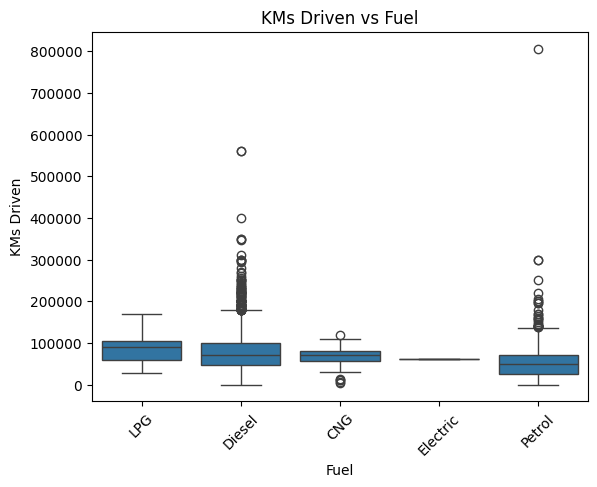

In [21]:
ax=sns.boxplot(x='fuel', y='km_driven', data=df, order=order)
ax.set_xlabel('Fuel')
ax.set_ylabel('KMs Driven')
ax.set_title('KMs Driven vs Fuel')
plt.xticks(rotation=45)
df['fuel'].value_counts()

Generally diesel cars are driven more than any other
LPG average running appear higher in chart because there are only 23 LPG cars
and only 1 electric car and CNG only 40 cars
so I would say only this with confidence that diesel cars are definitly driven more than petrol cars
rest of the fuel types being few in number, it cant be concluded with confidence